In [ ]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#Importing all neccessary libraries

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn import preprocessing
%matplotlib inline

In [ ]:
#importing the csv fil in dataframe named 'cancer'

cancer=pd.read_csv("/content/cancer_reg spreadsheet - Sheet1.csv")

In [ ]:
#using shape to know the row and columns of the dataframe
cancer.shape

(3047, 34)

In [ ]:
#using info to get all the info about dataframe row and columns
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [ ]:
#knowing the ocunts of Target_deathRate Variable of each value
cancer.TARGET_deathRate.value_counts()

184.3    11
182.8    10
176.4    10
179.9    10
173.6    10
         ..
229.5     1
121.0     1
147.0     1
236.4     1
126.7     1
Name: TARGET_deathRate, Length: 1053, dtype: int64

In [ ]:
#to display first 5 columns of the dataframe
cancer.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.74820,"(61494.5, 125635]",39.3,36.9,41.7,"Kitsap County, Washington",2.54,52.5,11.5,39.5,42.1,6.9,23.2,19.6,51.9,8.0,75.1,NaN,41.6,32.9,14.0,81.78053,2.594728,4.821857,1.843479,52.85608,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.11123,"(48021.6, 51046.4]",33.0,32.2,33.7,"Kittitas County, Washington",2.34,44.5,6.1,22.4,64.0,7.5,26.0,22.7,55.9,7.8,70.2,53.8,43.6,31.1,15.3,89.22851,0.969102,2.246233,3.741352,45.37250,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.56016,"(48021.6, 51046.4]",45.0,44.0,45.8,"Klickitat County, Washington",2.62,54.2,24.0,36.6,NaN,9.5,29.0,16.0,45.9,7.0,63.7,43.5,34.9,42.1,21.1,90.92219,0.739673,0.465898,2.747358,54.44487,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.63730,"(42724.4, 45201]",42.8,42.2,43.4,"Lewis County, Washington",2.52,52.7,20.2,41.2,36.1,2.5,31.6,9.3,48.3,12.1,58.4,40.3,35.0,45.3,25.0,91.74469,0.782626,1.161359,1.362643,51.02151,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.00000,"(48021.6, 51046.4]",48.3,47.8,48.9,"Lincoln County, Washington",2.34,57.8,14.9,43.0,40.0,2.0,33.4,15.0,48.2,4.8,61.6,43.9,35.1,44.0,22.7,94.10402,0.270192,0.665830,0.492135,54.02746,6.796657


In [ ]:
#to check whether there is any categorical values or not

categorical_feature_columns = list(set(cancer.columns) - set(cancer._get_numeric_data().columns))
categorical_feature_columns

['binnedInc', 'Geography']

In [ ]:
#removing categorical vlaue column

cancer.drop(["Geography"],axis=1,inplace=True)

In [ ]:
#removing categorical value column

cancer.drop(["binnedInc"],axis=1,inplace=True)

In [ ]:
#checking missing values sum of each column

cancer.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarriedHouseholds          0
BirthRat

In [ ]:
#removing the column with missing values

cancer.drop(["PctSomeCol18_24"],axis=1,inplace=True)
cancer.drop(["PctEmployed16_Over"],axis=1,inplace=True)
cancer.drop(["PctPrivateCoverageAlone"],axis=1,inplace=True)

In [ ]:
#removing the rows with all missing values

cancer.dropna(how='all')

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000,469,164.9,489.8000,61898,260131,11.2,499.74820,39.3,36.9,41.7,2.54,52.5,11.5,39.5,6.9,23.2,19.6,8.0,75.1,41.6,32.9,14.0,81.78053,2.594728,4.821857,1.843479,52.85608,6.118831
1,173.000,70,161.3,411.6000,48127,43269,18.6,23.11123,33.0,32.2,33.7,2.34,44.5,6.1,22.4,7.5,26.0,22.7,7.8,70.2,43.6,31.1,15.3,89.22851,0.969102,2.246233,3.741352,45.37250,4.333096
2,102.000,50,174.7,349.7000,49348,21026,14.6,47.56016,45.0,44.0,45.8,2.62,54.2,24.0,36.6,9.5,29.0,16.0,7.0,63.7,34.9,42.1,21.1,90.92219,0.739673,0.465898,2.747358,54.44487,3.729488
3,427.000,202,194.8,430.4000,44243,75882,17.1,342.63730,42.8,42.2,43.4,2.52,52.7,20.2,41.2,2.5,31.6,9.3,12.1,58.4,35.0,45.3,25.0,91.74469,0.782626,1.161359,1.362643,51.02151,4.603841
4,57.000,26,144.4,350.1000,49955,10321,12.5,0.00000,48.3,47.8,48.9,2.34,57.8,14.9,43.0,2.0,33.4,15.0,4.8,61.6,35.1,44.0,22.7,94.10402,0.270192,0.665830,0.492135,54.02746,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.668,15,149.6,453.5494,46961,6343,12.4,0.00000,44.2,41.1,48.8,2.08,51.0,20.9,27.9,8.4,32.2,15.2,4.3,78.3,44.6,31.7,13.2,90.28081,3.837754,0.327613,1.700468,51.06383,7.773512
3043,1962.668,43,150.1,453.5494,48609,37118,18.8,377.17550,30.4,29.3,31.4,2.90,52.6,26.7,33.9,3.8,23.1,12.4,4.6,64.5,48.6,28.8,17.7,75.70625,2.326771,4.044920,14.130290,52.00794,8.186470
3044,1962.668,46,153.9,453.5494,51144,34536,15.0,1968.96000,30.9,30.5,31.2,3.04,54.8,19.7,44.5,2.5,23.0,12.8,6.4,62.0,47.8,26.6,16.8,87.96163,2.313188,1.316472,5.680705,55.15395,7.809192
3045,1962.668,52,175.0,453.5494,50745,25609,13.3,0.00000,39.0,36.9,40.5,2.56,58.8,10.9,37.2,4.1,36.1,14.4,6.9,75.9,49.6,29.5,14.0,92.90568,1.176562,0.244632,2.131790,58.48423,7.582938


In [ ]:
#checking the columns with numerical values

numerical_feature_columns= list(cancer._get_numeric_data().columns)
numerical_feature_columns

['avgAnnCount',
 'avgDeathsPerYear',
 'TARGET_deathRate',
 'incidenceRate',
 'medIncome',
 'popEst2015',
 'povertyPercent',
 'studyPerCap',
 'MedianAge',
 'MedianAgeMale',
 'MedianAgeFemale',
 'AvgHouseholdSize',
 'PercentMarried',
 'PctNoHS18_24',
 'PctHS18_24',
 'PctBachDeg18_24',
 'PctHS25_Over',
 'PctBachDeg25_Over',
 'PctUnemployed16_Over',
 'PctPrivateCoverage',
 'PctEmpPrivCoverage',
 'PctPublicCoverage',
 'PctPublicCoverageAlone',
 'PctWhite',
 'PctBlack',
 'PctAsian',
 'PctOtherRace',
 'PctMarriedHouseholds',
 'BirthRate']

In [ ]:
#initializing the target variable as 'target'
target = 'TARGET_deathRate'

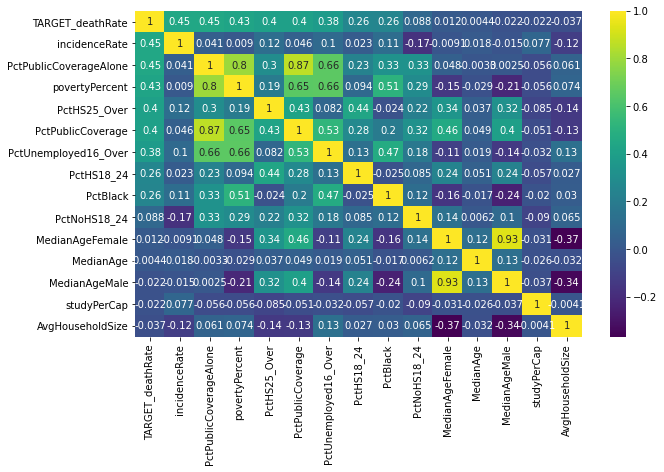

In [ ]:
#corelation with respect to different variables and taget variable
#which is 'TARGET_deathRate'
k=15
cols=cancer[numerical_feature_columns].corr().nlargest(k,target)[target].index
cm=cancer[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [ ]:
#function that accepts the model and gives accuracy
# and f1_score and confusion matrix 

def generate_accuracy_and_heatmap(model,x,y):
  ac=accuracy_score(y,model.predict(x))
  f_score=f1_score(y,model.predict(x))
  print('Accuracy is: ',ac)
  print('F1 score is: ',f_score)
  print("\n")
  print(pd.crosstab(pd.Series(model.predict(x), name='Predicted'),
                    pd.Series(y['TARGET_deathRate'],name='Actual')))
  return 1

In [ ]:
#seperate x and y columns
X = cancer.loc[:, cancer.columns != target]
Y = cancer.loc[:, cancer.columns == target]

In [ ]:
#to know shape of X

X.shape

(3047, 28)

In [ ]:
#to know shape of Y

Y.shape

(3047, 1)

In [ ]:
#splitting the data into train and test

x_train, x_test,y_train, y_test= train_test_split(X,Y, 
                                                  test_size=0.33,
                                                  random_state=10)

In [ ]:
x_train.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
270,249.0,88,651.3,32749,32477,25.8,0.000000,39.5,37.3,41.1,2.44,29.5,14.3,43.7,12.0,34.0,9.2,13.0,53.1,32.3,43.3,26.3,18.14899,77.072500,1.319927,1.273231,27.00929,4.372409
2024,71.0,27,433.1,51958,13628,10.2,0.000000,39.8,38.7,40.8,2.62,58.1,11.2,29.6,4.8,46.6,12.6,2.9,78.6,57.2,27.4,12.2,98.34278,0.828609,0.058148,0.341619,60.89831,3.887916
146,2353.0,876,399.5,57720,674836,17.7,1.481842,34.7,33.8,35.6,2.63,41.5,12.8,25.0,19.1,26.1,23.8,9.3,56.5,44.6,29.6,21.3,55.62639,12.748050,14.629980,13.560280,38.47522,5.344239
1911,71.0,35,423.4,34452,10160,23.1,0.000000,49.1,49.4,48.5,2.26,55.1,19.8,37.5,5.9,37.6,8.7,8.0,50.0,29.9,42.9,22.1,74.74629,22.921550,1.619828,0.087822,51.31078,1.660795
980,66.0,29,433.5,48277,11130,14.5,0.000000,44.8,45.0,44.5,2.53,45.4,16.8,40.5,13.0,38.5,9.0,8.5,67.2,45.3,35.3,17.2,55.74388,41.036680,0.000000,0.197292,46.16805,1.972921


In [ ]:
y_train.head()

,TARGET_deathRate
270,224.4
2024,161.3
146,152.6
1911,205.0
980,183.4


In [ ]:
import statsmodels.api as sm

In [ ]:
# Add a constant to get an intercept
x_train_sm = sm.add_constant(x_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, x_train_sm).fit()

In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     78.09
Date:                Tue, 18 Aug 2020   Prob (F-statistic):          1.68e-296
Time:                        15:16:57   Log-Likelihood:                -8933.9
No. Observations:                2041   AIC:                         1.793e+04
Df Residuals:                    2012   BIC:                         1.809e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    127